In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [72]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils._bunch.Bunch

In [73]:
  
# # IMPORT THE IRIS DATA FROM THE 
# # SKLEARN MODULE
# from sklearn.datasets import load_iris
  
# # LOAD THE IRIS DATASET BY CALLING
# # THE FUNCTION
# iris_data = load_iris()
 
  
# # PLACE THE IRIS DATA IN A PANDAS
# # DATAFRAME
# attr = pd.DataFrame(data=iris_data.data, 
#                   columns=iris_data.feature_names)
# target =pd.DataFrame({'Species': iris_data.target})

# # DISPLAY FIRST 5 RECORDS OF THE 
# # DATAFRAME
# target.head()
# attr.head(10)

In [74]:
# Loading iris
df = pd.read_csv('./UCI_heart.csv')
# df.head()
print(df.describe())
# #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type
df.head(10)

              age         sex    trestbps        chol         fbs     restecg  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

          thalach       exang  Heart_problem  
count  303.000000  303.000000     303.000000  
mean   149.607261    0.326733       0.458746  
std     22.875003    0.469794       0.499120  
min     71.000000    0.000000       0.000000  
25%    133.500000    0.000000      

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,Heart_problem,Age_Quantile
0,63,1,145,233,1,2,150,0,0,Q4
1,67,1,160,286,0,2,108,1,1,Q4
2,67,1,120,229,0,2,129,1,1,Q4
3,37,1,130,250,0,0,187,0,0,Q1
4,41,0,130,204,0,2,172,0,0,Q1
5,56,1,120,236,0,0,178,0,0,Q2
6,62,0,140,268,0,2,160,0,1,Q4
7,57,0,120,354,0,0,163,1,0,Q3
8,63,1,130,254,0,2,147,0,1,Q4
9,53,1,140,203,1,2,155,1,1,Q2


In [75]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
attr = df.drop(columns = ['Heart_problem'])  # features
attr = pd.get_dummies(attr)

target = df['Heart_problem']  # target variable
# attr.head()
target.head()

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []


0    0
1    1
2    1
3    0
4    0
Name: Heart_problem, dtype: int64

In [76]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,Age_Quantile_Q1,Age_Quantile_Q2,Age_Quantile_Q3,Age_Quantile_Q4
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.0,0.0,0.0,1.0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.0,0.0,0.0,1.0
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.0,0.0,0.0,1.0
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,1.0,0.0,0.0,0.0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,1.0,0.0,0.0,0.0


In [77]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 3, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

245    1
162    0
10     0
161    1
73     1
Name: Heart_problem, dtype: int64

In [78]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [1,3, 5]
confusion_matrices={}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')
    
    cm = confusion_matrix(target_test, target_pred)
    confusion_matrices[k] = cm

Accuracy of model with k = 1: 0.6578947368421053%

Accuracy of model with k = 3: 0.6578947368421053%

Accuracy of model with k = 5: 0.6842105263157895%



In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))


Confusion Matrix
[[29 11]
 [13 23]]

Accuracy score
0.6842105263157895

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.72      0.71        40
           1       0.68      0.64      0.66        36

    accuracy                           0.68        76
   macro avg       0.68      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76



In [80]:
# target_pred.head()
attr_test['target_pred']=target_pred
# print(target_test)
attr_test['target_actual']= target_test
attr_test.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,Age_Quantile_Q1,Age_Quantile_Q2,Age_Quantile_Q3,Age_Quantile_Q4,target_pred,target_actual
245,0.791667,1.0,0.245283,0.253425,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0,1
162,0.520833,0.0,0.150943,0.200913,0.0,0.0,0.664122,0.0,0.0,1.0,0.0,0.0,0,0
10,0.583333,1.0,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.0,0.0,1.0,0.0,1,0
161,1.000000,1.0,0.292453,0.406393,0.0,1.0,0.694656,1.0,0.0,0.0,0.0,1.0,1,1
73,0.750000,1.0,0.150943,0.278539,0.0,1.0,0.664122,0.0,0.0,0.0,0.0,1.0,1,1


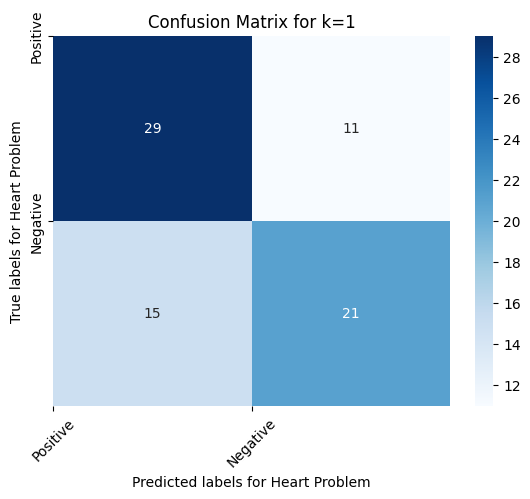

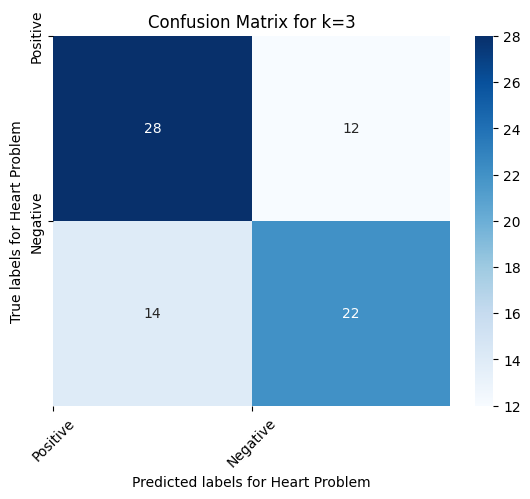

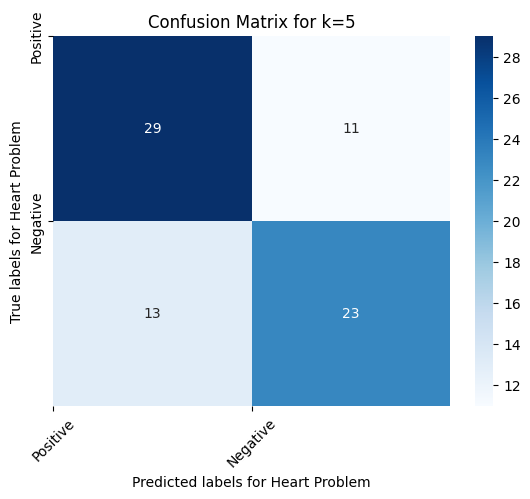

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt     


class_labels = ["Positive", "Negative"]


for k, cm in confusion_matrices.items():
    fig, ax = plt.subplots()
    # Plot the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    # Set tick positions and labels for both axes
    ax.set_xticks(range(len(class_labels))) # Set the tick positions based on number of labels
    ax.set_yticks(range(len(class_labels)))
    ax.set_xticklabels(class_labels, rotation=45)
    ax.set_yticklabels(class_labels)
    ax.set_xlabel('Predicted labels for Heart Problem')
    ax.set_ylabel('True labels for Heart Problem')
    ax.set_title(f'Confusion Matrix for k={k}')
    # Display the plot
    plt.show()